In [123]:
import string
import pandas as pd
from collections import Counter
from matplotlib import pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [124]:
"""
removing unwanted columns from the dataset

"""
text = pd.read_excel('Ticket Samples for Analysis.xlsx')
dropList = [col for col in text.columns if col not in ['Subject', 'Mail']]
text = text.drop(columns = dropList)
text.head()

,Subject,Mail
0,RPP/Covid Sample - No Order for Adams Mary Exe...,"Good afternoon, \nWe received a RPP/Covid samp..."
1,Sanford guide,"Hello,\nI noticed that the Sanford guide did n..."
2,Default Test Request - Connecticut Foot Care C...,Hi Support. Please see attached default test ...
3,case,Has been finalized but needs to be removed as ...
4,new feature,"Hey guys,\nWould it be possible to make the dr..."


In [125]:
stop_words = [ 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your',
              'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', 
              "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 
              'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
              'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 
              'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 
              'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 
              'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 
              'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 
              's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 
              'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 
              'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', 
              "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 
              'wouldn', "wouldn't", 'morning', 'good', 'greetings', 'regards', 'thanks', 'afternoon', 'thank', 'you', 'hello',
              'hi', 'support', 'hey', 'vital', 'evening', 'please' , 'today', 'see', 'default' , 'following']

In [126]:
"""
Pre-processing the text in following steps:
1. Conversion into lower case
2. Removing the punctuations
3. Removing the stop words after splitting the sentence into words
4. Converting the list of final words into a string

"""
def clean_text(mail):
    complaint = mail.lower()
    clean = complaint.translate(str.maketrans('', '', string.punctuation))
    tokens = clean.split()
    final = []
    for word in tokens:
        if word not in stop_words:
            final.append(word)
    final_complaint = ""
    for j in final:
        final_complaint+=j
        final_complaint+=" "
    return final_complaint

In [127]:
"""
function for performing sentiment analysis on the processed text
"""
def sentiment_scores(sentence):
    obj = SentimentIntensityAnalyzer()
    scores = obj.polarity_scores(sentence)
    print(sentence)
    print()
    print("Overall sentiment dictionary is: ", scores)
    print("Complaint was rated as ", scores['neg']*100, "% Negative") 
    print("Complaint was rated as ", scores['neu']*100, "% Neutral") 
    print("Complaint was rated as ", scores['pos']*100, "% Positive") 
    print("Complaint is overall Rated As", end = " ") 
    if scores['compound'] >= 0.05 : 
        print("Positive") 
        str =  "Positive"
  
    elif scores['compound'] <= - 0.05 : 
        print("Negative") 
        str =  "Negative"
  
    else : 
        print("Neutral")
        str =  "Neutral"
    return str

In [128]:
"""
doing sentiment analysis for each row

"""

total_rows = text.shape[0]
lst = []
for i in range(total_rows):
    complaint = text['Mail'][i]
    final_complaint = clean_text(complaint)
    print("Customer Reported Communication",i,":\n")
    emotion = sentiment_scores(final_complaint)
    lst.append(emotion)
    print('-'*50)
    print()


Customer Reported Communication 0 :

received rppcovid sample executive medical xxxxxx unfortunately isnt order get one created let know questions 

Overall sentiment dictionary is:  {'neg': 0.138, 'neu': 0.747, 'pos': 0.115, 'compound': -0.1027}
Complaint was rated as  13.8 % Negative
Complaint was rated as  74.7 % Neutral
Complaint was rated as  11.5 % Positive
Complaint is overall Rated As Negative
--------------------------------------------------

Customer Reported Communication 1 :

noticed sanford guide attach 4 uti results make fixing issue top priority groups heavily rely information help guide treatment yesterday’s uti results upload issue caused sanford guide attach today’s results 

Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.857, 'pos': 0.143, 'compound': 0.5423}
Complaint was rated as  0.0 % Negative
Complaint was rated as  85.7 % Neutral
Complaint was rated as  14.299999999999999 % Positive
Complaint is overall Rated As Positive
------------------------------

Overall sentiment dictionary is:  {'neg': 0.237, 'neu': 0.763, 'pos': 0.0, 'compound': -0.4767}
Complaint was rated as  23.7 % Negative
Complaint was rated as  76.3 % Neutral
Complaint was rated as  0.0 % Positive
Complaint is overall Rated As Negative
--------------------------------------------------

Customer Reported Communication 20 :

order court palm aire failed cross vo capstones dx req xxxxx name estelle filippelli 

Overall sentiment dictionary is:  {'neg': 0.378, 'neu': 0.622, 'pos': 0.0, 'compound': -0.8074}
Complaint was rated as  37.8 % Negative
Complaint was rated as  62.2 % Neutral
Complaint was rated as  0.0 % Positive
Complaint is overall Rated As Negative
--------------------------------------------------

Customer Reported Communication 21 :

bips talked another case need help accession number xxxxx rejected case made correction “correctionpending signout” status revert back rejection case won’t hanging around active case 

Overall sentiment dictionary is:  {'neg': 

create account tara dufala mirrors access rights within vitalaxis lab administrator lab technician nju 

Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.861, 'pos': 0.139, 'compound': 0.2732}
Complaint was rated as  0.0 % Negative
Complaint was rated as  86.1 % Neutral
Complaint was rated as  13.900000000000002 % Positive
Complaint is overall Rated As Positive
--------------------------------------------------

Customer Reported Communication 39 :

order buckingham houston didnt cross vo sparrows dx req attached 

Overall sentiment dictionary is:  {'neg': 0.308, 'neu': 0.692, 'pos': 0.0, 'compound': -0.6124}
Complaint was rated as  30.8 % Negative
Complaint was rated as  69.19999999999999 % Neutral
Complaint was rated as  0.0 % Positive
Complaint is overall Rated As Negative
--------------------------------------------------

Customer Reported Communication 40 :

active collect account un” xxxx” 

Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.597, 'pos': 0.403, 'compo

Complaint was rated as  83.6 % Neutral
Complaint was rated as  16.400000000000002 % Positive
Complaint is overall Rated As Positive
--------------------------------------------------

Customer Reported Communication 62 :

team provide dx templates configured fwc split case type fields edit accordingly send brian 

Overall sentiment dictionary is:  {'neg': 0.235, 'neu': 0.765, 'pos': 0.0, 'compound': -0.6124}
Complaint was rated as  23.5 % Negative
Complaint was rated as  76.5 % Neutral
Complaint was rated as  0.0 % Positive
Complaint is overall Rated As Negative
--------------------------------------------------

Customer Reported Communication 63 :

prefix case showing “sagis20“ happening fix 

Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Complaint was rated as  0.0 % Negative
Complaint was rated as  100.0 % Neutral
Complaint was rated as  0.0 % Positive
Complaint is overall Rated As Neutral
--------------------------------------------------


hello…… assigned pathologist office select yes reassign case another available pathologist continue pathologist message removed pops click case number returned work monday may 11th hank u 

Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.852, 'pos': 0.148, 'compound': 0.4588}
Complaint was rated as  0.0 % Negative
Complaint was rated as  85.2 % Neutral
Complaint was rated as  14.799999999999999 % Positive
Complaint is overall Rated As Positive
--------------------------------------------------

Customer Reported Communication 85 :

orders 5156 243pm 

Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Complaint was rated as  0.0 % Negative
Complaint was rated as  100.0 % Neutral
Complaint was rated as  0.0 % Positive
Complaint is overall Rated As Neutral
--------------------------------------------------

Customer Reported Communication 86 :

im experiencing slowness submitting orders vo wondering could speed 

Overall sentiment dictionary i

Counter({'Neutral': 40, 'Positive': 35, 'Negative': 24})


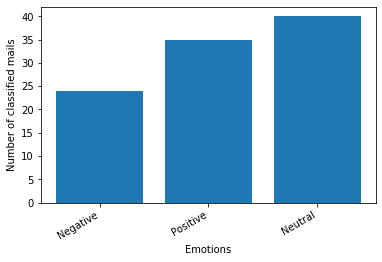

In [129]:
"""
counting the number of mails in each category: positive, negative and neutral
and then plotting the graph
"""
n = Counter(lst)
print(n)

fig, ax1 = plt.subplots()
ax1.bar(n.keys(), n.values())
plt.xlabel("Emotions")
plt.ylabel("Number of classified mails")
fig.autofmt_xdate()
plt.show()